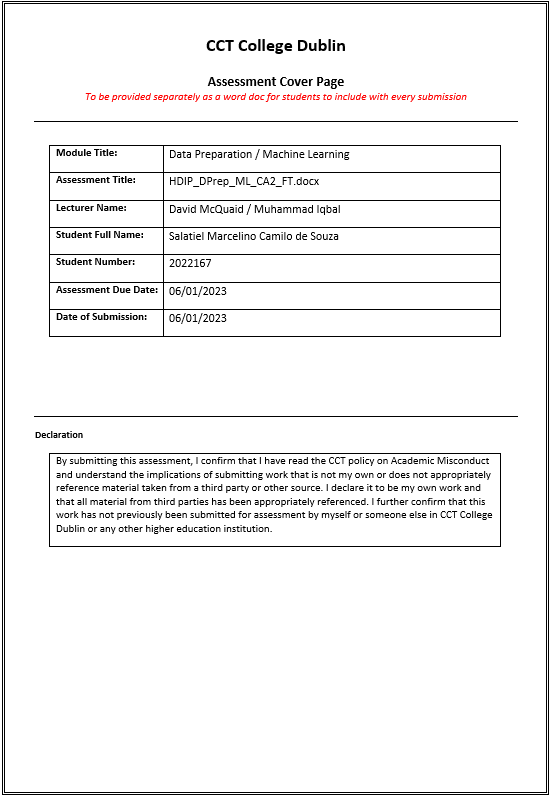

# SHILL BIDDING DATASET

Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to
find the real price of items in the market based on the demand. The price offered by anyone participating in
this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use
classification or clustering algorithms to predict the bids in the future. It would be necessary to clean and prepare
the dataset for the machine learning modelling under the following guidelines for Data Preparation and
Machine Learning modules.

## SUMMARY:


- IMPORTING LIBRARIES



- READING AND VIZUALIZING DATAFRAME



- DICTIONARY



- EDA - EXPLORATORY DATA ANALYSIS



- CLEANING THE DATA



- DATA VISUALISATION 



- DEALING WITH THE OUTLIERS



- IMPORTANCE FEATURES



- IMPLEMENTING LDA



- IMPLEMENTING PCA



- COMPARING DF, LDA AND PCA



- BEST ML MODELS TO PERFORM



- ML MODELS, CROSS VALIDATIONS AND CONFUSION MATRIX



- PERFORMING MODELS WITH DF_PCA



- CONCLUSION OF THE RESULTS



- REFERENCE LIST

## IMPORTING LIBRARIES

A library is a collection of functions that can be added to the Python code and called as necessary, just like any other function. This will be the first step of this dataset.  

For this project, the following libraries will be imported:

- Pandas: This library has been one of the most commonly used tools for Data Science and Machine learning, which is used for data cleaning and analysis. In other words, the best tools to work with a messy database.

- Numpy: Numpy will be useful to perform a wide variety of mathematical operations on arrays.

- Seaborn: This one will be used for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

- Matplotlib: It will make it possible to create numerous and diverse plot(graphs) types. In other words, it is used more for graph creation and easy visualization of the data.

- Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures. Plotly Express provides functions to visualize a variety of types of data. Most functions such as px. bar or px.

- Warnings: To avoid the usual warning messages issued in situations where it is useful to alert the user of some condition in a program.

In [1]:

# Data Manipulation
import pandas as pd
import numpy as np


# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px



# OTHER LIBRARIES WILL BE CALLED ALONG THE DATASET TO MAKE IT EASIER TO MANAGE.


np.warnings.filterwarnings('ignore')

## READING AND VIZUALIZING DATAFRAME

In [2]:
missing_value_formats = ['n.a.','?','NA','n/a', 'na', '--']
df = pd.read_csv('Shill Bidding Dataset.csv', na_values = missing_value_formats)

## DICTIONARY

- Record ID: Unique identifier of a record in the dataset.

- Auction ID: Unique identifier of an auction.

- Bidder ID: Unique identifier of a bidder.

- Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

- Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

- Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

- Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.

- Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

- Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

- Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.

- Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.

- Auction Duration: How long an auction lasted.

- Class: 0 for normal behaviour bidding; 1 for otherwise.

In [3]:
df

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0             1         732     _***i         0.200000       0.400000   
1             2         732     g***r         0.024390       0.200000   
2             3         732     t***p         0.142857       0.200000   
3             4         732     7***n         0.100000       0.200000   
4             5         900     z***z         0.051282       0.222222   
...         ...         ...       ...              ...            ...   
6316      15129         760     l***t         0.333333       0.160000   
6317      15137        2481     s***s         0.030612       0.130435   
6318      15138        2481     h***t         0.055556       0.043478   
6319      15139        2481     d***d         0.076923       0.086957   
6320      15144        2481     a***l         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
0                       0.0      0.000028      0.000000   
1                       0.0      0.013123      0.000000   
2                       0.0      0.003042      0.000000   
3                       0.0      0.097477      0.000000   
4                       0.0      0.001318      0.000000   
...                     ...           ...           ...   
6316                    1.0      0.738557      0.280000   
6317                    0.0      0.005754      0.217391   
6318                    0.0      0.015663      0.217391   
6319                    0.0      0.068694      0.217391   
6320                    0.0      0.340351      0.217391   

      Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
0                   0.993593       0.000028       0.666667                 5   
1                   0.993593       0.013123       0.944444                 5   
2                   0.993593       0.003042       1.000000                 5   
3                   0.993593       0.097477       1.000000                 5   
4                   0.000000       0.001242       0.500000                 7   
...                      ...            ...            ...               ...   
6316                0.993593       0.686358       0.888889                 3   
6317                0.993593       0.000010       0.878788                 7   
6318                0.993593       0.015663       0.000000                 7   
6319                0.993593       0.000415       0.000000                 7   
6320                0.993593       0.340351       0.000000                 7   

      Class  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
6316      1  
6317      0  
6318      0  
6319      0  
6320      0  

[6321 rows x 13 columns]

## EDA - EXPLORATORY DATA ANALYSIS

In [4]:
df.describe().T

count         mean          std       min  \
Record_ID               6321.0  7535.829457  4364.759137  1.000000   
Auction_ID              6321.0  1241.388230   735.770789  5.000000   
Bidder_Tendency         6321.0     0.142541     0.197084  0.000000   
Bidding_Ratio           6321.0     0.127670     0.131530  0.011765   
Successive_Outbidding   6321.0     0.103781     0.279698  0.000000   
Last_Bidding            6321.0     0.463119     0.380097  0.000000   
Auction_Bids            6321.0     0.231606     0.255252  0.000000   
Starting_Price_Average  6321.0     0.472821     0.489912  0.000000   
Early_Bidding           6321.0     0.430683     0.380785  0.000000   
Winning_Ratio           6321.0     0.367731     0.436573  0.000000   
Auction_Duration        6321.0     4.615093     2.466629  1.000000   
Class                   6321.0     0.106787     0.308867  0.000000   

                                25%          50%           75%           max  
Record_ID               3778.000000  7591.000000  11277.000000  15144.000000  
Auction_ID               589.000000  1246.000000   1867.000000   2538.000000  
Bidder_Tendency            0.027027     0.062500      0.166667      1.000000  
Bidding_Ratio              0.043478     0.083333      0.166667      1.000000  
Successive_Outbidding      0.000000     0.000000      0.000000      1.000000  
Last_Bidding               0.047928     0.440937      0.860363      0.999900  
Auction_Bids               0.000000     0.142857      0.454545      0.788235  
Starting_Price_Average     0.000000     0.000000      0.993593      0.999935  
Early_Bidding              0.026620     0.360104      0.826761      0.999900  
Winning_Ratio              0.000000     0.000000      0.851852      1.000000  
Auction_Duration           3.000000     5.000000      7.000000     10.000000  
Class                      0.000000     0.000000      0.000000      1.000000

In [5]:
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [7]:
print(df.shape)

(6321, 13)


In [8]:
df['Bidder_ID'].describe()

count      6321
unique     1054
top       a***a
freq        112
Name: Bidder_ID, dtype: object

In [9]:
df_quali = df.select_dtypes(include=['object'])

In [10]:
df_quali

Bidder_ID
0        _***i
1        g***r
2        t***p
3        7***n
4        z***z
...        ...
6316     l***t
6317     s***s
6318     h***t
6319     d***d
6320     a***l

[6321 rows x 1 columns]

In [11]:
df_quant = df.select_dtypes(exclude=['object'])

The nominal feature was separated from its original data visualise with only numbers for while.

In [12]:
df_quant

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0             1         732         0.200000       0.400000   
1             2         732         0.024390       0.200000   
2             3         732         0.142857       0.200000   
3             4         732         0.100000       0.200000   
4             5         900         0.051282       0.222222   
...         ...         ...              ...            ...   
6316      15129         760         0.333333       0.160000   
6317      15137        2481         0.030612       0.130435   
6318      15138        2481         0.055556       0.043478   
6319      15139        2481         0.076923       0.086957   
6320      15144        2481         0.016393       0.043478   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
0                       0.0      0.000028      0.000000   
1                       0.0      0.013123      0.000000   
2                       0.0      0.003042      0.000000   
3                       0.0      0.097477      0.000000   
4                       0.0      0.001318      0.000000   
...                     ...           ...           ...   
6316                    1.0      0.738557      0.280000   
6317                    0.0      0.005754      0.217391   
6318                    0.0      0.015663      0.217391   
6319                    0.0      0.068694      0.217391   
6320                    0.0      0.340351      0.217391   

      Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
0                   0.993593       0.000028       0.666667                 5   
1                   0.993593       0.013123       0.944444                 5   
2                   0.993593       0.003042       1.000000                 5   
3                   0.993593       0.097477       1.000000                 5   
4                   0.000000       0.001242       0.500000                 7   
...                      ...            ...            ...               ...   
6316                0.993593       0.686358       0.888889                 3   
6317                0.993593       0.000010       0.878788                 7   
6318                0.993593       0.015663       0.000000                 7   
6319                0.993593       0.000415       0.000000                 7   
6320                0.993593       0.340351       0.000000                 7   

      Class  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
6316      1  
6317      0  
6318      0  
6319      0  
6320      0  

[6321 rows x 12 columns]

In [13]:
# Checking for duplicates

df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


## CLEANING THE DATA

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are used to visualize patterns or correlations, particularly in large and complex data sets. They can be useful for identifying trends, making comparisons, and detecting outliers.

Heatmaps can be created in a Jupyter notebook using the seaborn library. This library provides a number of functions for creating heatmaps, including the heatmap() function, which allows you to easily create a heatmap from a data frame or array. The heatmap() function has many options for customizing the appearance of the heatmap, including the ability to change the color map, add annotations, and specify the scale.

They are also a useful visualization tool for data scientists and analysts, as they can help to quickly identify patterns and trends in data. They are particularly useful for identifying correlations and can be used to identify areas where further analysis is needed.

In this case, it is being displayed to analyse if there is correlation between the features Record ID and Auction ID or even between the other features

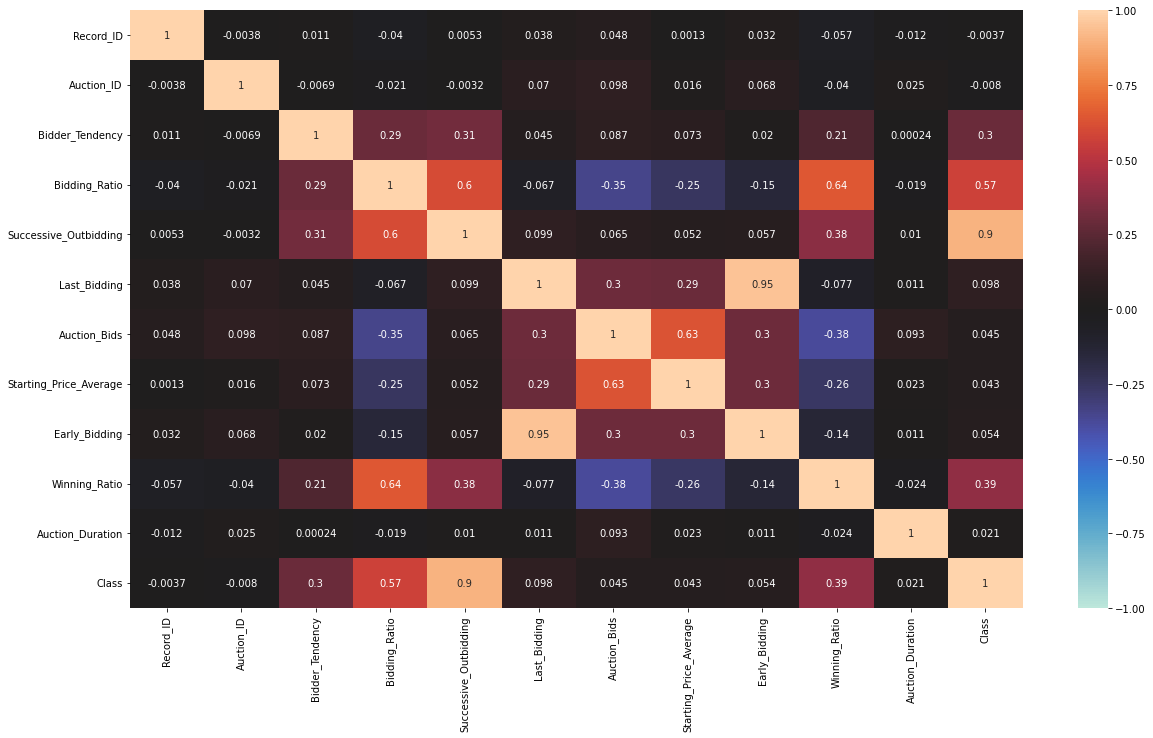

In [14]:
## Defining the size of the figure
rcParams['figure.figsize'] = 20, 11


## Correlation Matrix
correlation_matrix = df_quant.corr()


## Heatmap
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0)


## Defining position of the tricks and axis
plt.yticks(rotation=360)
plt.xticks(rotation=90)


## Ploting the figure
plt.show() 

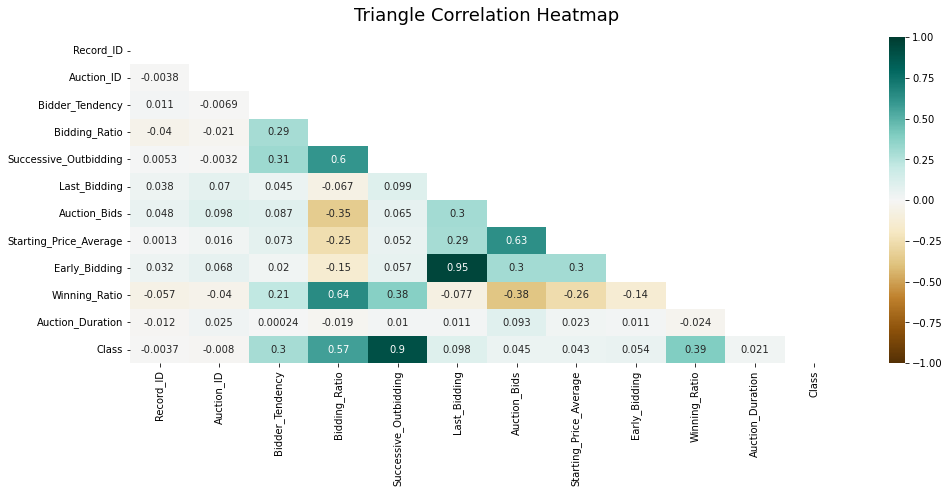

In [15]:
# Triangle correlation Heatmap

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Usually, but not always, ID features have less correlation with the other features in the dataset. As it was noticed, there's no significant correlation between the features "Record_ID", "Bidder_ID", "Auction_ID". Therefore, it was decided to cut them out of the dataset to proceed with the analysis.

In [16]:
df.drop(columns=['Record_ID', 'Bidder_ID', 'Auction_ID'], inplace = True, axis = 1)
df

Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
0            0.200000       0.400000                    0.0      0.000028   
1            0.024390       0.200000                    0.0      0.013123   
2            0.142857       0.200000                    0.0      0.003042   
3            0.100000       0.200000                    0.0      0.097477   
4            0.051282       0.222222                    0.0      0.001318   
...               ...            ...                    ...           ...   
6316         0.333333       0.160000                    1.0      0.738557   
6317         0.030612       0.130435                    0.0      0.005754   
6318         0.055556       0.043478                    0.0      0.015663   
6319         0.076923       0.086957                    0.0      0.068694   
6320         0.016393       0.043478                    0.0      0.340351   

      Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  \
0         0.000000                0.993593       0.000028       0.666667   
1         0.000000                0.993593       0.013123       0.944444   
2         0.000000                0.993593       0.003042       1.000000   
3         0.000000                0.993593       0.097477       1.000000   
4         0.000000                0.000000       0.001242       0.500000   
...            ...                     ...            ...            ...   
6316      0.280000                0.993593       0.686358       0.888889   
6317      0.217391                0.993593       0.000010       0.878788   
6318      0.217391                0.993593       0.015663       0.000000   
6319      0.217391                0.993593       0.000415       0.000000   
6320      0.217391                0.993593       0.340351       0.000000   

      Auction_Duration  Class  
0                    5      0  
1                    5      0  
2                    5      0  
3                    5      0  
4                    7      0  
...                ...    ...  
6316                 3      1  
6317                 7      0  
6318                 7      0  
6319                 7      0  
6320                 7      0  

[6321 rows x 10 columns]

## DATA VISUALISATION

Histograms are used to visualize the distribution of a data set. They are a useful tool for understanding the underlying distribution of a data set and identifying patterns and trends. A histogram is a bar graph where the X-axis represents the bins (intervals) that the data is divided into, and the Y-axis represents the frequency or count of data points in each bin.

The seaborn library (sns) is a popular library for data visualization in Python. It provides a high-level interface for drawing attractive and informative statistical graphics. One of the functions provided by seaborn is the histplot() function, which can be used to easily create histograms in a Jupyter notebook. The histplot() function has many options for customizing the appearance of the histogram, including the ability to change the bin size, adjust the transparency of the bars, and add annotations.

In summary, histograms are used to visualize the distribution of a data set, and the seaborn library provides a convenient way to create histograms in a Jupyter notebook. Histograms are a useful tool for understanding the underlying distribution of a data set and identifying patterns and trends.

The following plot was called to check the discrepancy of the Class feature. where 0 represent normal bidding and 1, the anomalies, which represents nearly 10% of the normal biddings.

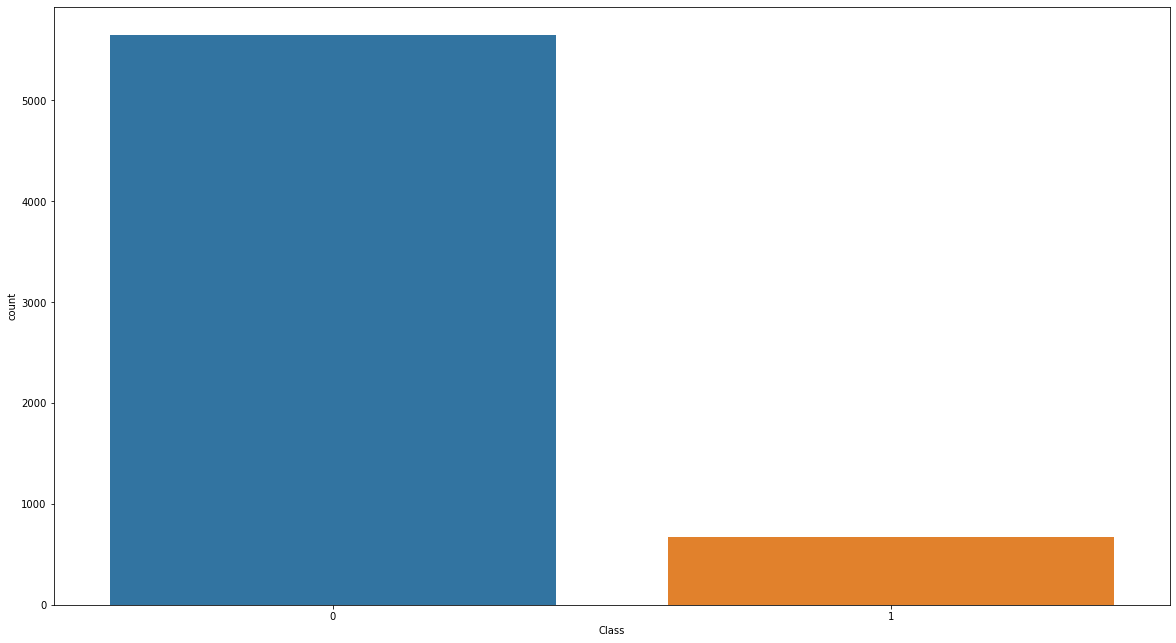

None
0    5646
1     675
Name: Class, dtype: int64


In [17]:
sns.countplot(df['Class'])
print(plt.show())
print(df.Class.value_counts())

The next plot will be called to visualise all the features of the dataset and have an idea of their distribution. This way, it will give us a better understanding of the business description and analyse it with more criteria

<function matplotlib.pyplot.show(close=None, block=None)>

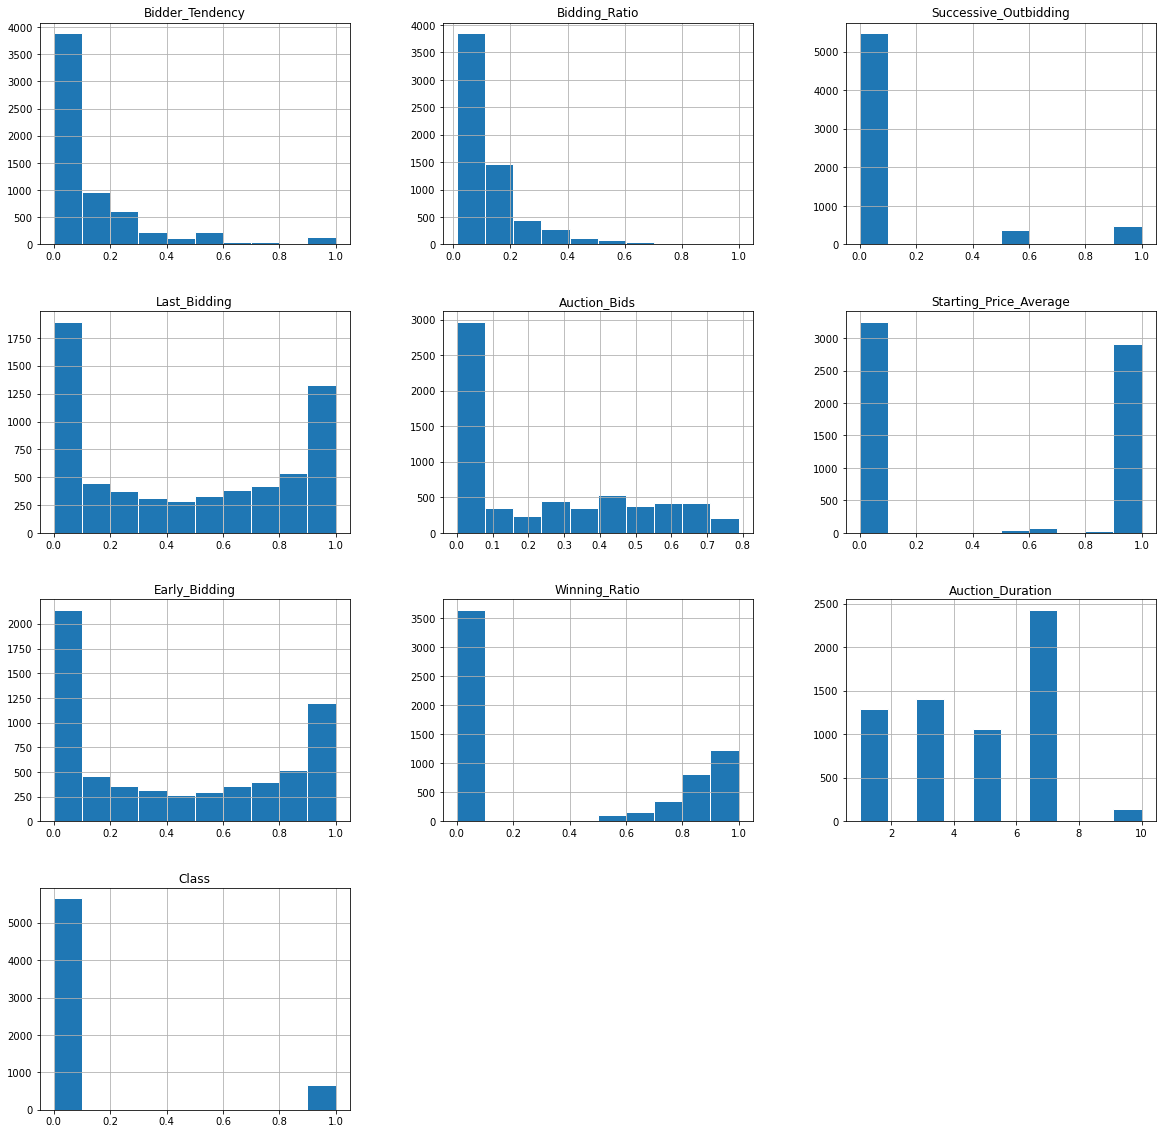

In [18]:
df.hist(figsize = (20,20), edgecolor = 'white') 
plt.show

The following plot of histograms will display the frequency of the atributes' distribution

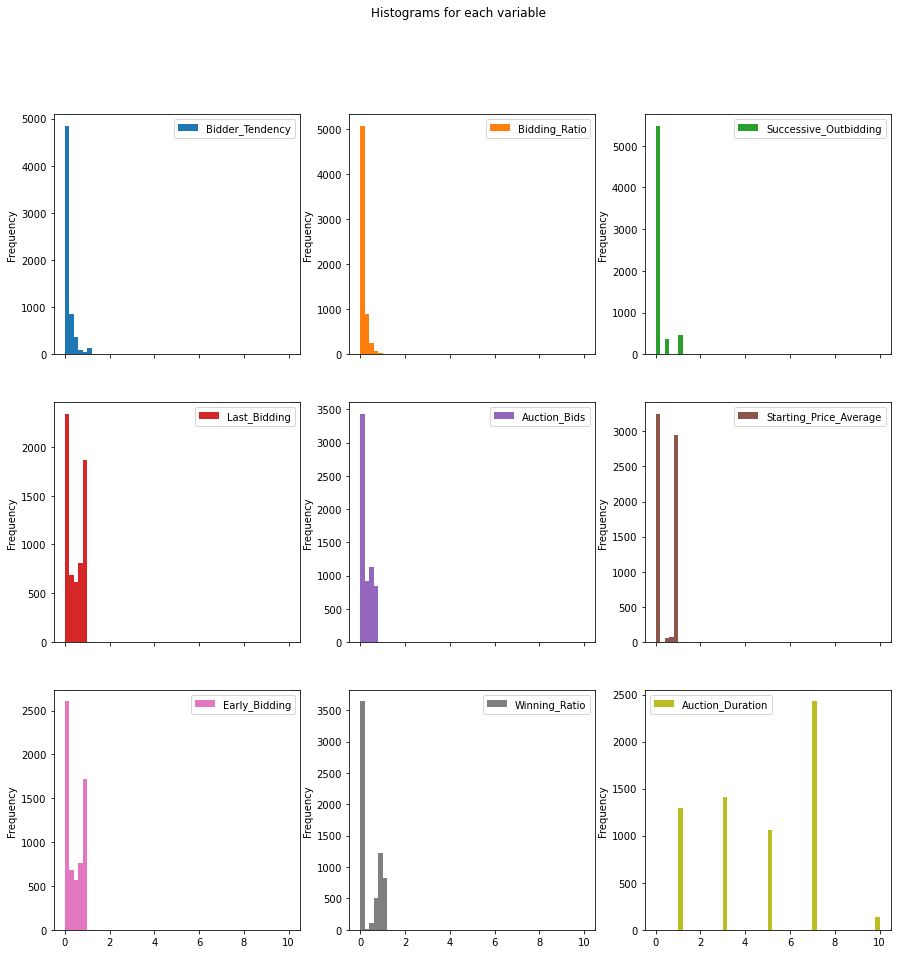

In [19]:
df.drop('Class', axis = 1).plot(kind = 'hist', subplots = True, layout = (3, 3), figsize = (15, 15), bins = 50,
                                 title = 'Histograms for each variable');

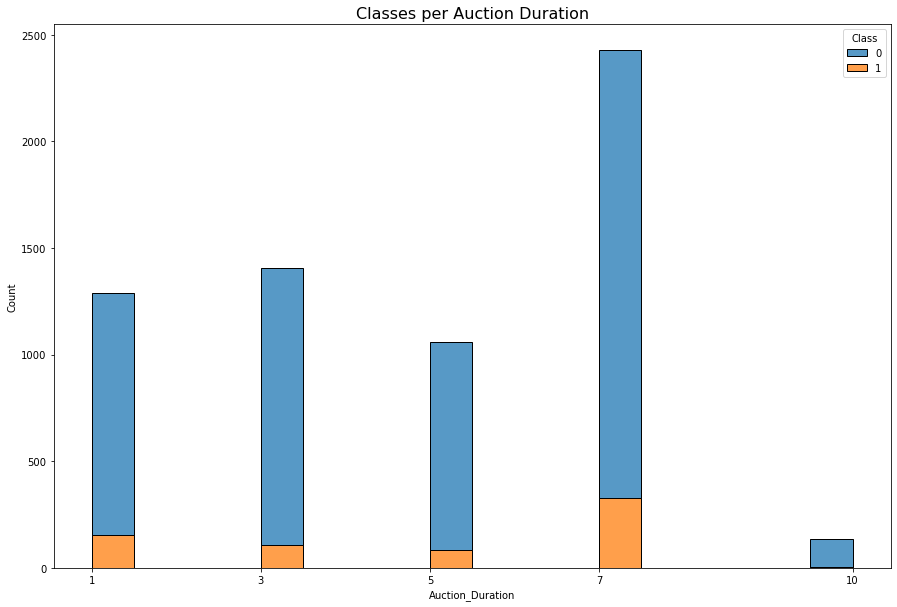

In [20]:
# Plotting a histogram to check the proportion of Classes per Auction Duration

plt.figure(figsize = (15, 10))
aucdur_class = sns.histplot(binwidth = 0.5, x = 'Auction_Duration', hue = 'Class', data = df, stat = 'count',
                            multiple = 'stack')

aucdur_class.axes.set_title('Classes per Auction Duration',fontsize = 16)
aucdur_class.set_xticks([1, 3, 5, 7, 10]);

It's possible see above how the duration of 7 hours were more frequenty than the others and how 10h were the smallers one

## DEALING WITH THE OUTLIERS

A box plot, also known as a box and whisker plot, is a graphical representation of a data set that displays the minimum, first quartile, median, third quartile, and maximum values of the data. It is a useful tool for understanding the underlying distribution of a data set and identifying patterns and trends.

Box plots are especially useful for comparing the distribution of multiple data sets. The box plot displays the main summary statistics of the data (minimum, first quartile, median, third quartile, and maximum) in a single plot, making it easy to compare the distributions of multiple data sets.

Box plots are also useful for identifying outliers in a data set. Outliers are data points that are significantly different from the rest of the data and can indicate errors or anomalies in the data. Box plots can help to identify outliers by displaying them as individual points outside the main body of the plot.

In summary, box plots are a useful tool for understanding the underlying distribution of a data set, comparing the distributions of multiple data sets, and identifying outliers in the data.

An outlier is a data item/object that deviates significantly from the rest of the objects (called normals). They can be caused by measurement or execution errors. Analysis for outliers is known as outliers mining and they can affect the results of the data for such a contrasting value in features where they don't fit within.

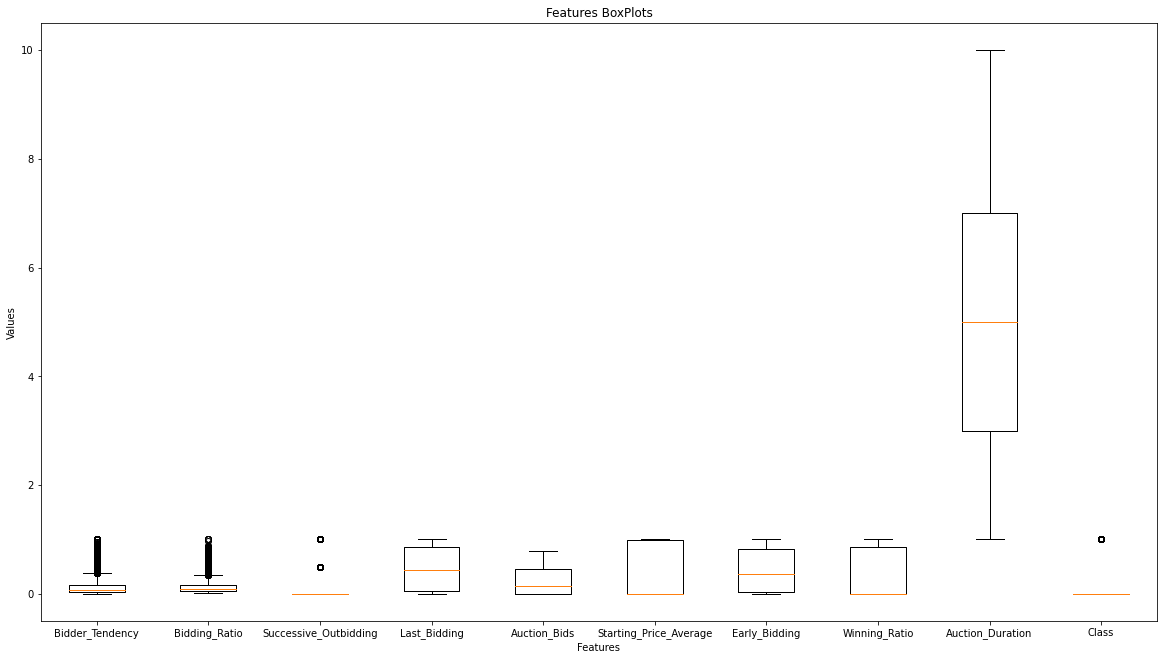

In [21]:
# Creating a boxplot graph of all features
fig, ax = plt.subplots()
ax.boxplot(df.values)

# Adiciona um título e os rótulos de eixo
plt.title('Features BoxPlots')
plt.xlabel('Features')
plt.ylabel('Values')

# Add the labels of the features on the axis x
ax.set_xticklabels(df.keys())

# Display the graph
plt.show()

In the blox plot chart above, it is possible to notice a few features with outliers just by taking a look at them. It is notorious that the features 'Bidder_Tendency' and 'Bidding_Ratio', the data is highly discrepant from their respective mean in the same feature so the next step will be analyse them all and treat the outliers applying the mean of the upper fence line to make them become more balanced and easier to work with.


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Probability Density')

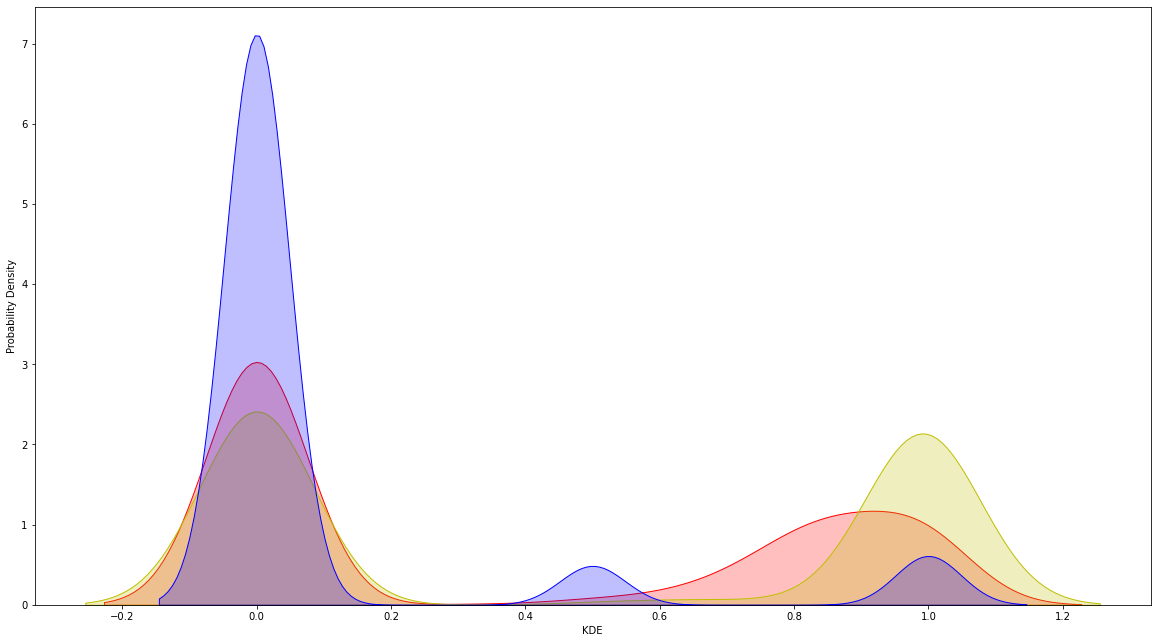

In [22]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

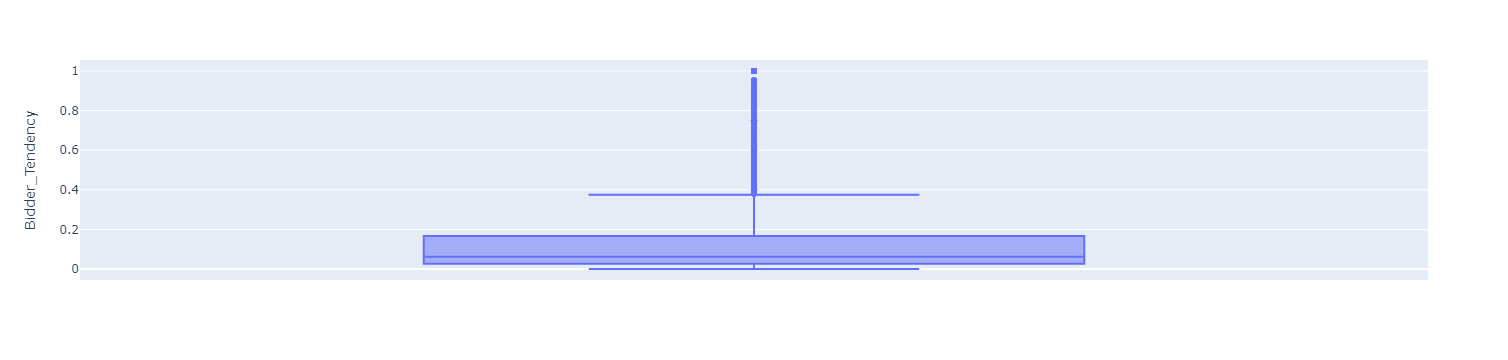

In [23]:
graph1 = px.box(df, y = 'Bidder_Tendency')
graph1.show()

In [24]:
df['Bidder_Tendency'].describe()

count    6321.000000
mean        0.142541
std         0.197084
min         0.000000
25%         0.027027
50%         0.062500
75%         0.166667
max         1.000000
Name: Bidder_Tendency, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

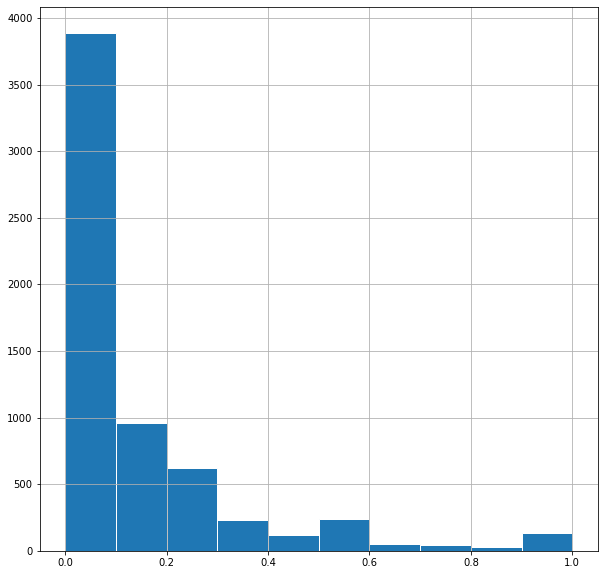

In [25]:
# plot the histogram of the feature to have an idea of the variation

df['Bidder_Tendency'].hist(figsize = (10,10), edgecolor = 'white') 
plt.show

In [26]:
df.loc[(df['Bidder_Tendency']>0.375, 'Bidder_Tendency')]=df['Bidder_Tendency'].median()

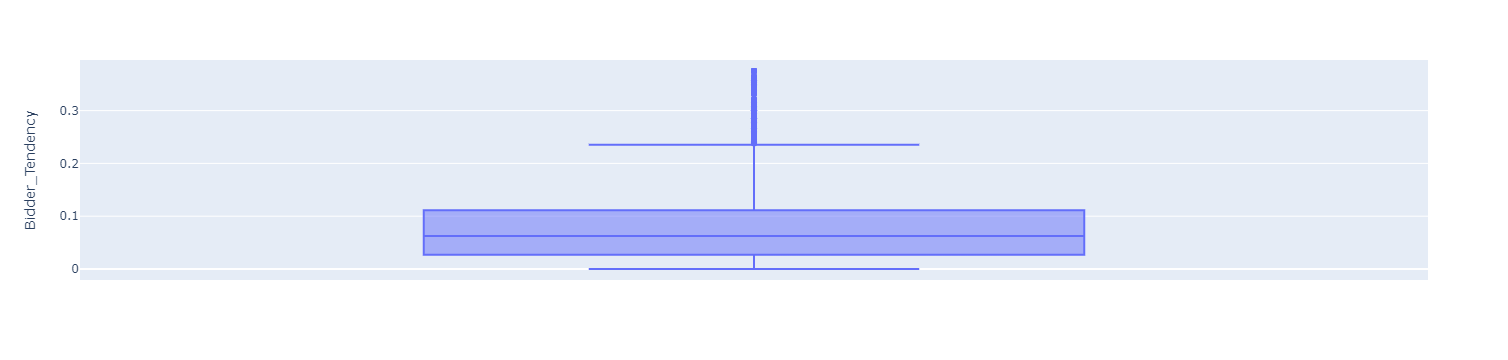

In [27]:
graph1 = px.box(df, y = 'Bidder_Tendency')
graph1.show()

<function matplotlib.pyplot.show(close=None, block=None)>

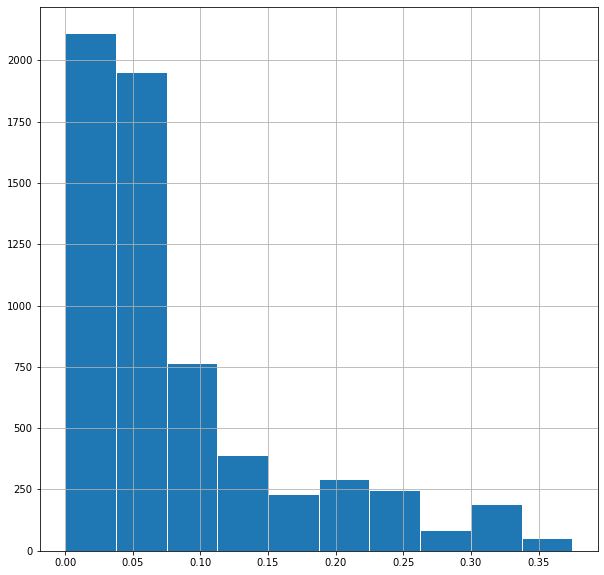

In [28]:
# plot the histogram of the feature to have an idea of the variation

df['Bidder_Tendency'].hist(figsize = (10,10), edgecolor = 'white') 
plt.show

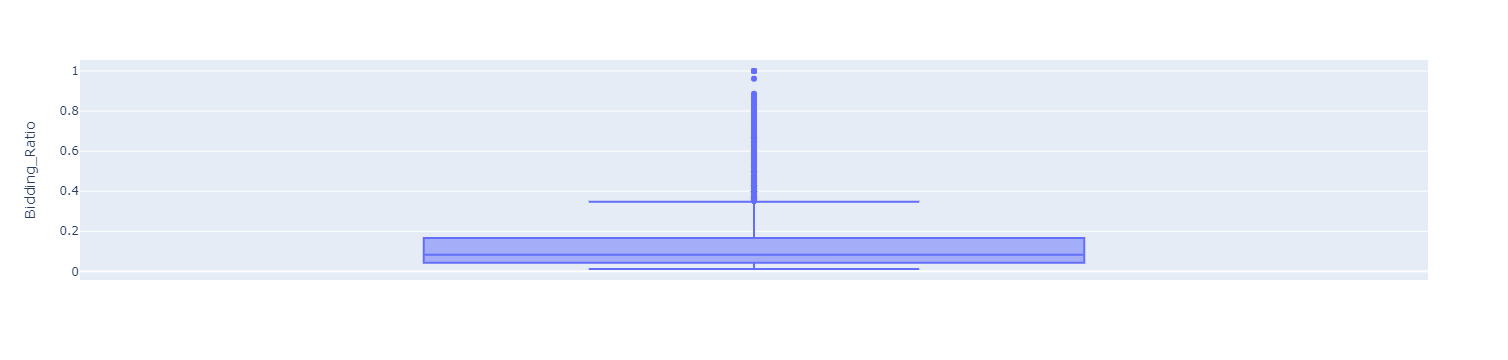

In [29]:
graph2 = px.box(df, y = 'Bidding_Ratio')
graph2.show()

In [30]:
df['Bidding_Ratio'].describe()

count    6321.000000
mean        0.127670
std         0.131530
min         0.011765
25%         0.043478
50%         0.083333
75%         0.166667
max         1.000000
Name: Bidding_Ratio, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

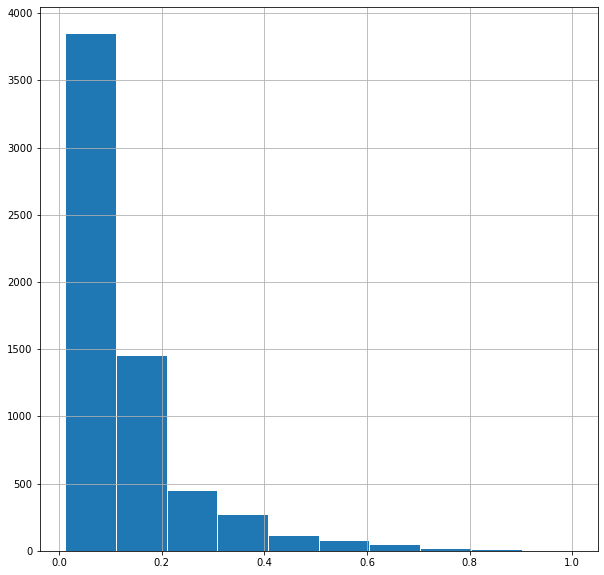

In [31]:
# plot the histogram of the feature to have an idea of the variation

df['Bidding_Ratio'].hist(figsize = (10,10), edgecolor = 'white') 
plt.show

In [32]:
df.loc[(df['Bidding_Ratio']>0.3478261, 'Bidding_Ratio')]=df['Bidding_Ratio'].median()

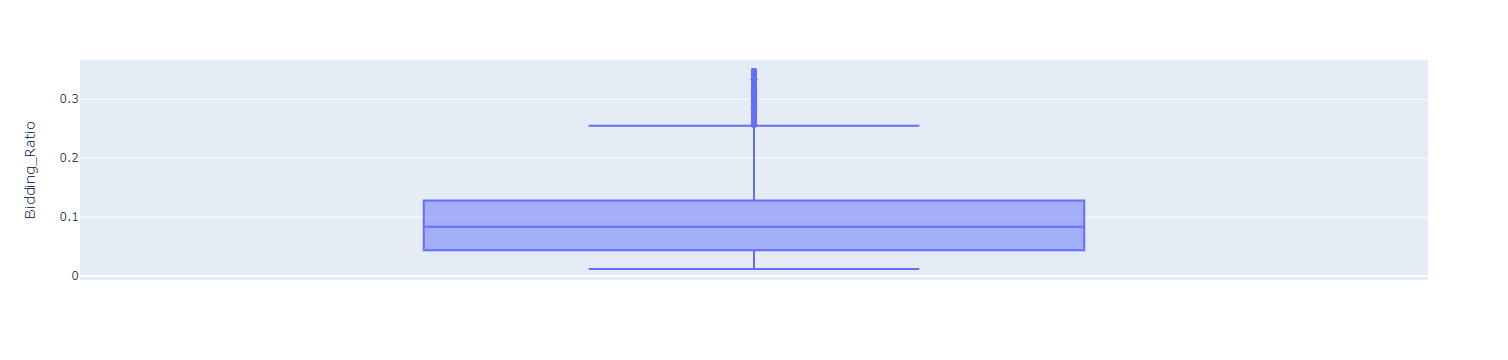

In [33]:
graph2 = px.box(df, y = 'Bidding_Ratio')
graph2.show()

<function matplotlib.pyplot.show(close=None, block=None)>

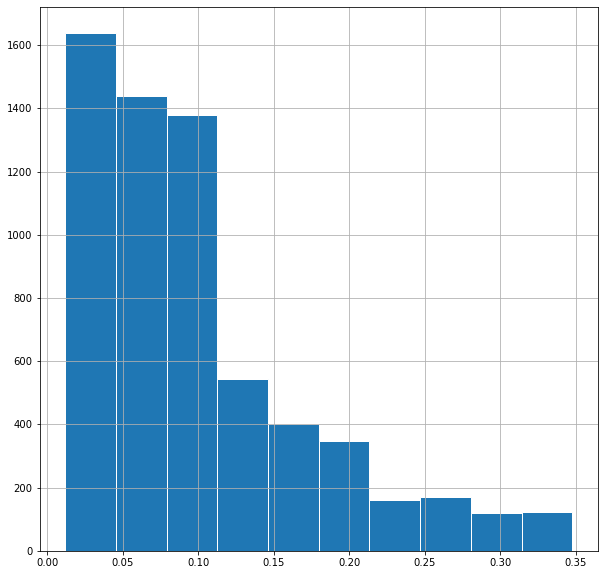

In [34]:
# plot the histogram of the feature to have an idea of the variation

df['Bidding_Ratio'].hist(figsize = (10,10), edgecolor = 'white') 
plt.show

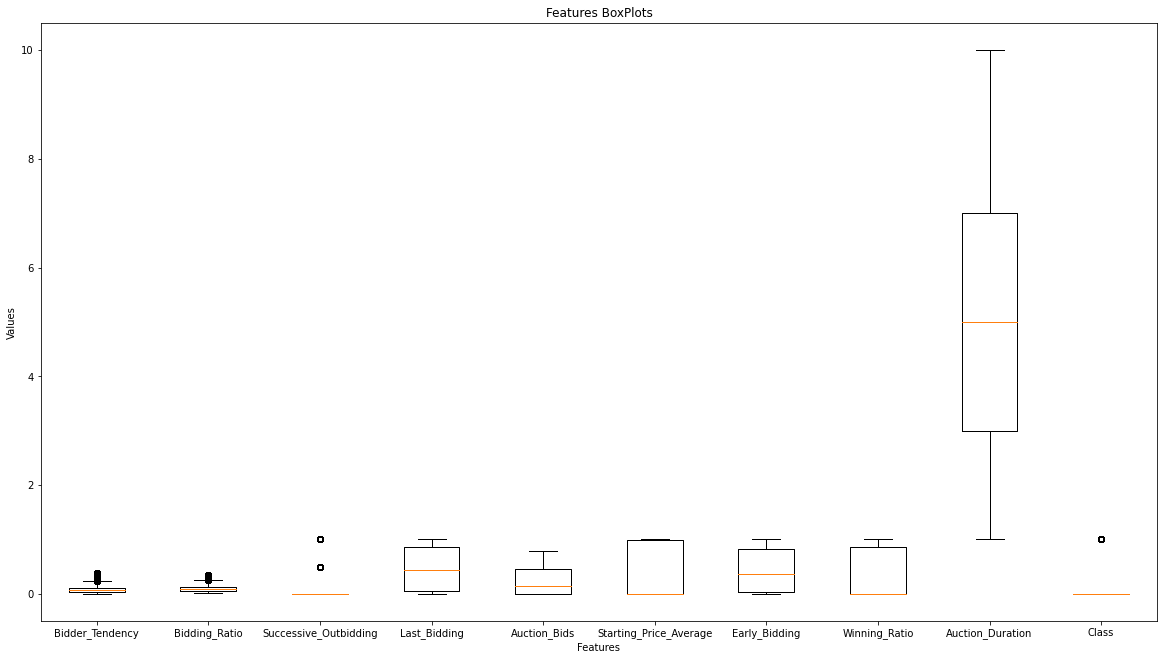

In [35]:
# Creating a boxplot graph of all features
fig, ax = plt.subplots()
ax.boxplot(df.values)

# Adiciona um título e os rótulos de eixo
plt.title('Features BoxPlots')
plt.xlabel('Features')
plt.ylabel('Values')

# Add the labels of the features on the axis x
ax.set_xticklabels(df.keys())

# Display the graph
plt.show()

## IMPORTANCE FEATURES

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

In [36]:
X = df.drop(columns = 'Class')
y = df['Class']

In [37]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [38]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')

Text(0, 0.5, 'Percentage of importances')

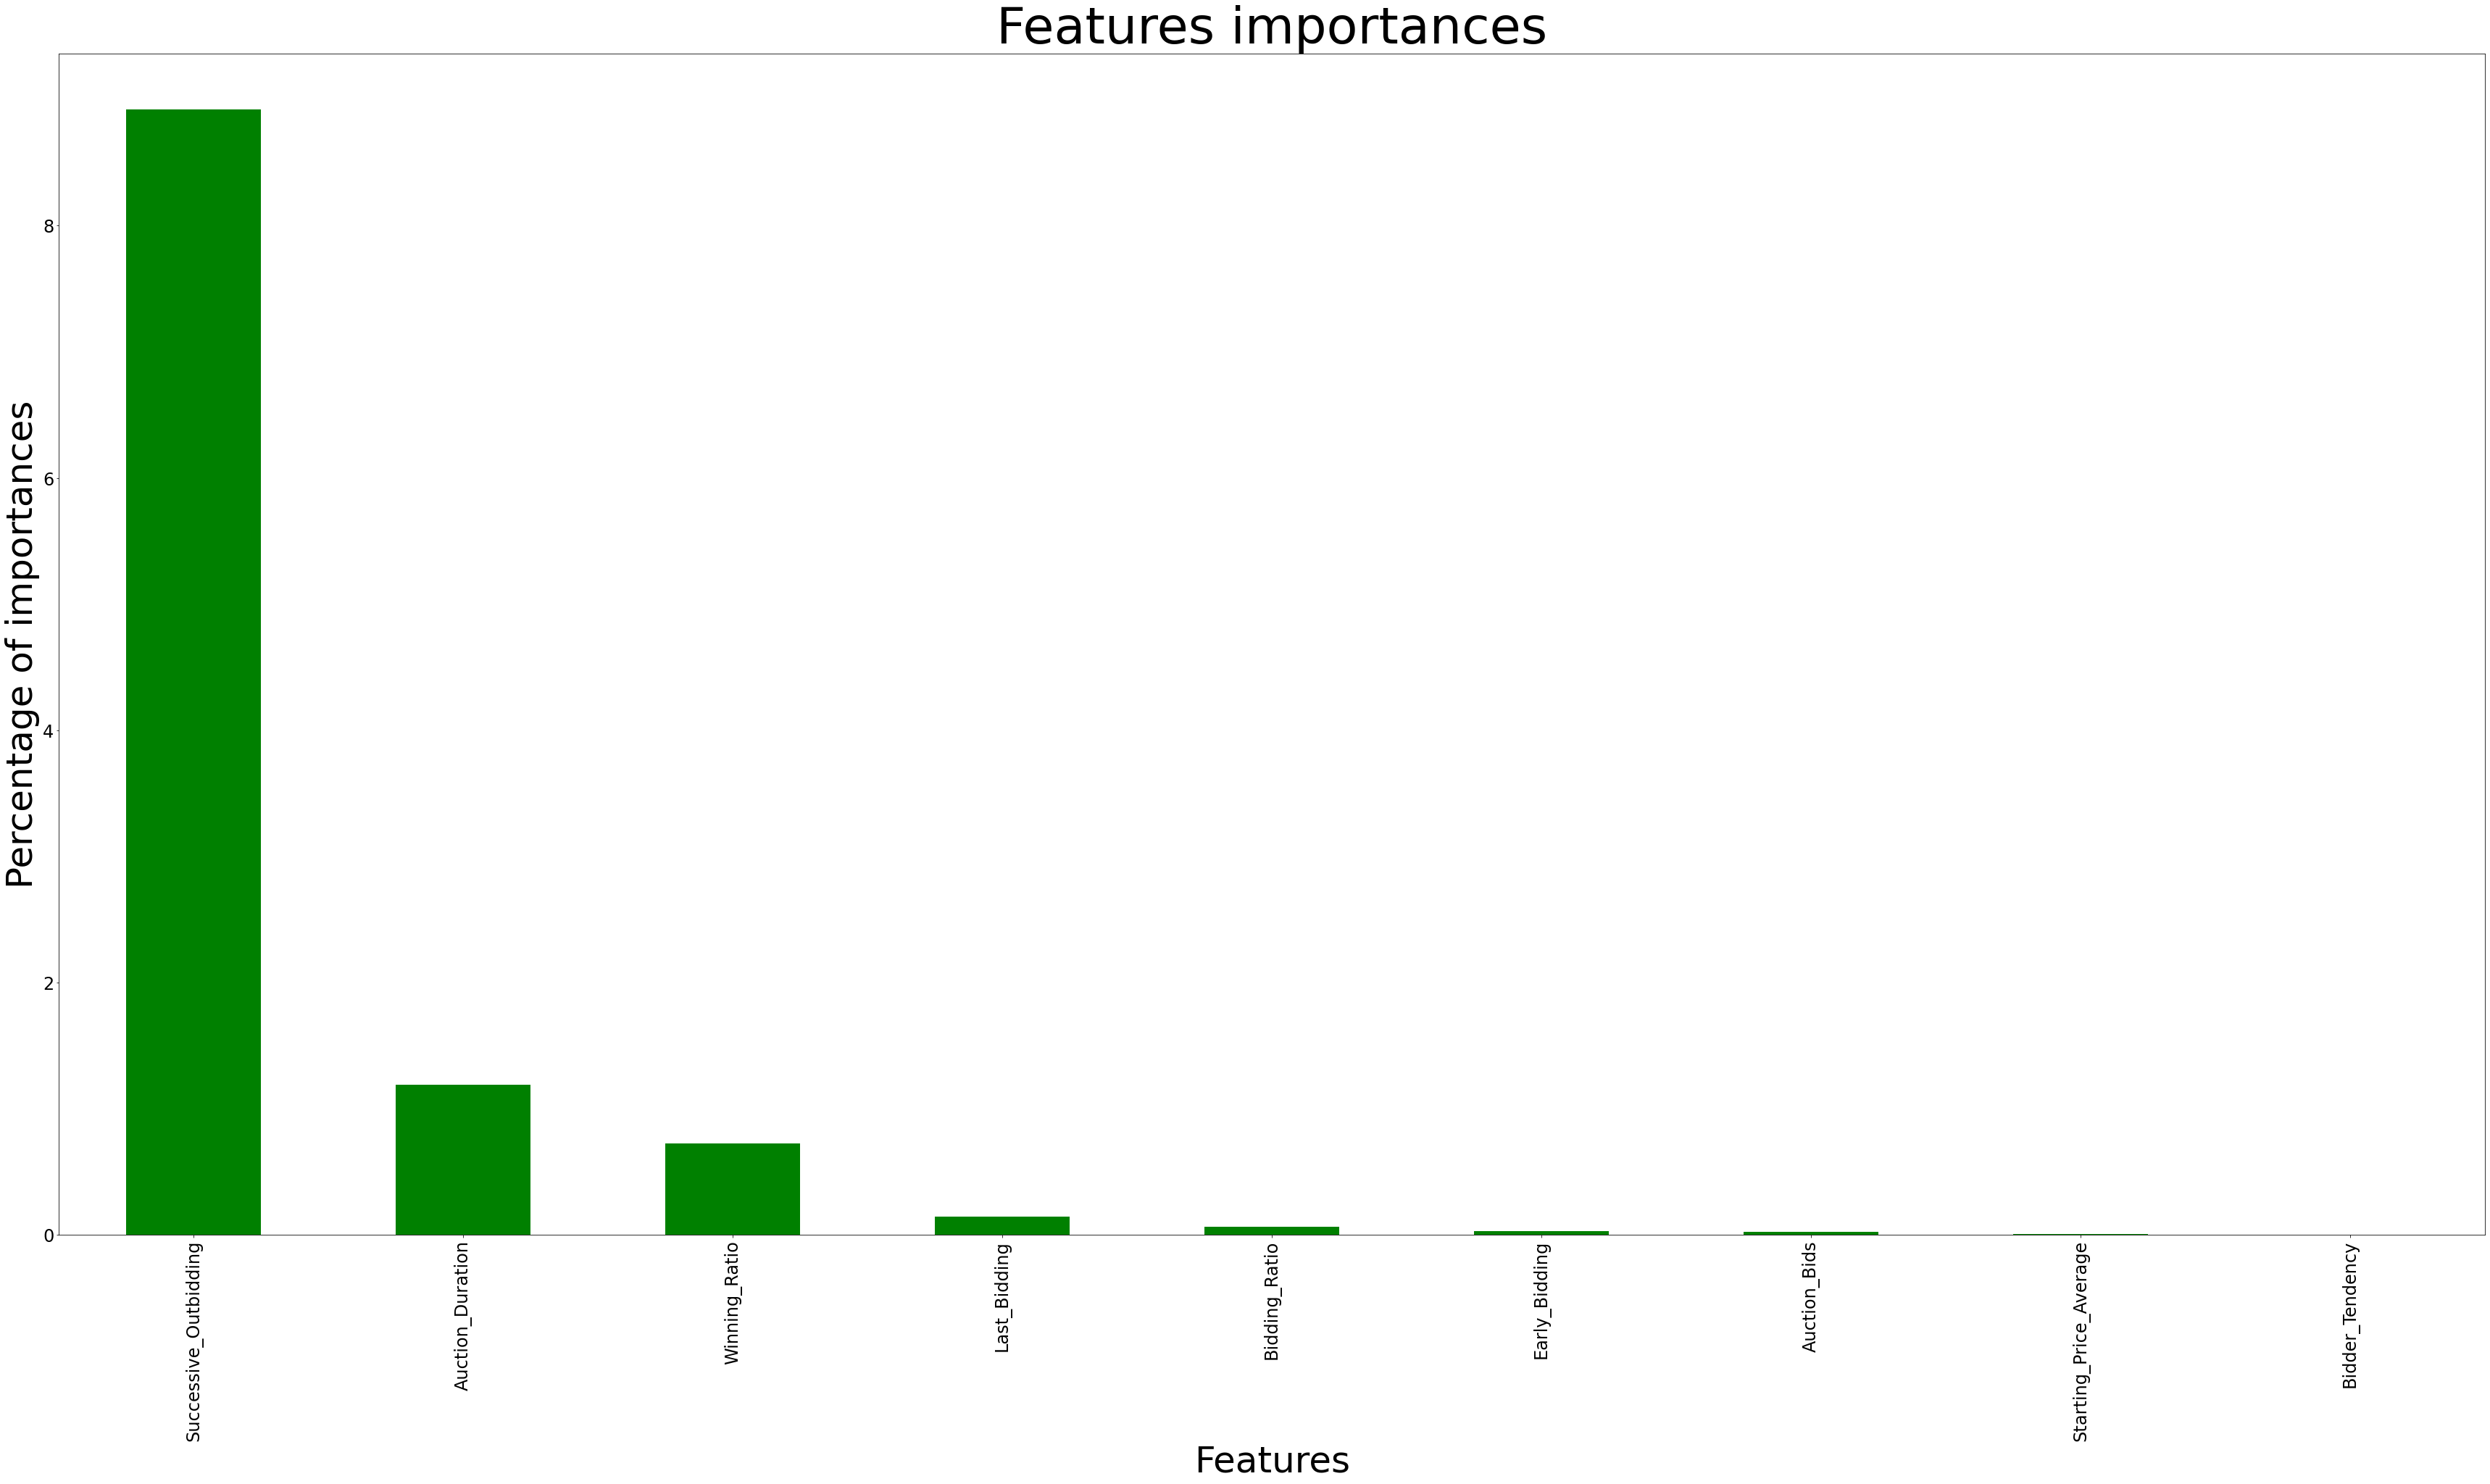

In [39]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'green')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

It's possible to see now, that the three most important features for predicting the target variable are:

- Successive_Outbidding;
- Auction_Duration;
- Winning_Ratio,

and the less important are:

- Starting_Price_Average;
- Auction_ID;
- Early_Bidding.

## IMPLEMENTIG LDA

Linear Discriminant Analysis (LDA) is a supervised classification method that is used to distinguish between two or more classes. It is based on a linear discriminant analysis, which means that it tries to find a linear combination of features that best separates examples from different classes.

LDA will be applied to the dataset to reduce the number of features while still retaining as much information as possible. This can make it easier to visualize the data, train a model on the data, or interpret the results of the model. It can also help to improve the performance of the model by removing noise or redundant features.

In [40]:
from sklearn.model_selection import train_test_split

#Training the dataset
X = df.iloc[:,0:-1].values  # All variables without the target variable
y = df.iloc[:,-1].values # All variables including the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (6321, 9) (6321,)
Number of rows and columns after splitting dataset:  (4740, 9) (1581, 9) (4740,) (1581,)


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



lda = LinearDiscriminantAnalysis()


x_lda = lda.fit_transform(X,y)


predictions = lda.predict(X)


accuracy = lda.score(X_test, y_test)


print("Accuracy:", accuracy)


lda.explained_variance_ratio_

Accuracy: 0.9690069576217584


array([1.])

In [43]:
predictions_df = pd.DataFrame(data = predictions, columns = ['Class'])
predictions_df['Class']

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

In [44]:
linear_df = pd.DataFrame(data = x_lda, columns = ['LDA'])
linear_df['Class'] = predictions_df['Class']
linear_df

LDA  Class
0    -0.78      0
1    -0.62      0
2    -0.60      0
3    -0.59      0
4    -0.75      0
...    ...    ...
6316  7.44      1
6317 -0.65      0
6318 -0.96      0
6319 -0.92      0
6320 -0.94      0

[6321 rows x 2 columns]

In [45]:
linear_df.describe()

LDA   Class
count 6321.00 6321.00
mean    -0.00    0.13
std      2.33    0.34
min     -1.10    0.00
25%     -0.98    0.00
50%     -0.89    0.00
75%     -0.65    0.00
max      7.74    1.00

After creating the new dataframe, a histogram will be displayed to make the vizualisation easier to compreend and analyse.

<function matplotlib.pyplot.show(close=None, block=None)>

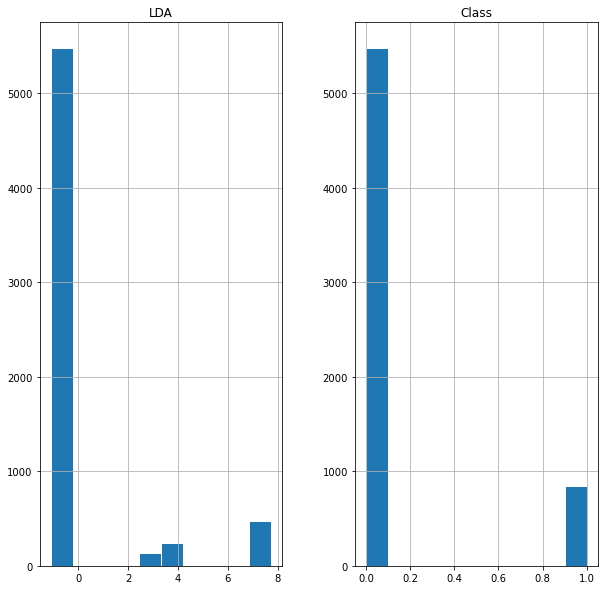

In [46]:
linear_df.hist(figsize = (10,10), edgecolor = 'white') 
plt.show

## IMPLEMENTING PCA

Principal component analysis (PCA) is a method used in machine learning to reduce the dimensionality of a dataset by finding a new set of dimensions, called principal components, that capture as much of the variance in the data as possible. These dimensions are found by rotating the original dimensions of the data in such a way that the first principal component has the largest possible variance, the second principal component has the second largest variance, and so on.

PCA is being applied to the dataset to visualize the data, to reduce the number of features, or to improve the performance of a machine learning model. Reducing the number of features can make it easier to visualize the data, train a model on the data, or interpret the results of the model. It can also help to improve the performance of the model by removing noise or redundant features.

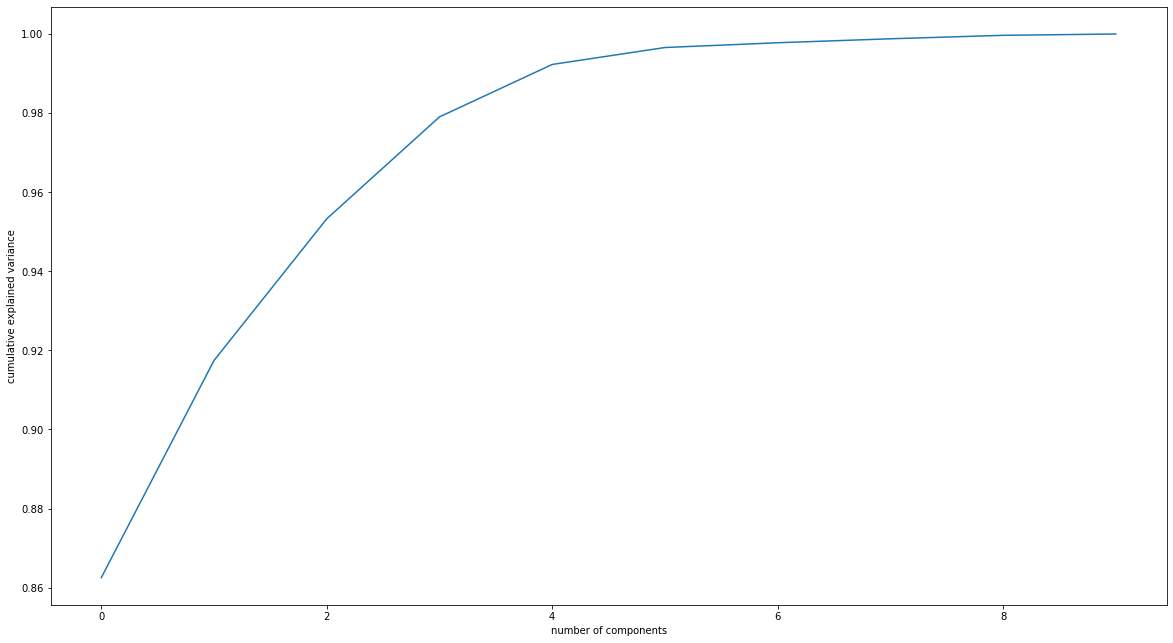

In [47]:
# Import PCA
from sklearn.decomposition import PCA

# Define PCA
pca = PCA()

# Train the PCA model using the data
pca.fit(X)

# Aooly PCA transformation
X_transformed = pca.transform(X)

df_no_label = df.drop(df["Class"])
pca = PCA().fit(df_no_label)


plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

The PCA line above shows the curve of the cumulative variance and its respectives number or components. A clear and easier interpretation of that is, with only 6 new dimensionality features (components) it will be possible to create a new dataset (it will be called it df_pca) with over 98% of variance. 

In [48]:
pca = PCA(6)
projected = pca.fit_transform(df_no_label)

In [49]:
projected.shape

(6319, 6)

In [50]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])
df_pca

C1    C2    C3    C4    C5    C6
0     0.38 -0.36  0.03  0.71 -0.69 -0.20
1     0.38 -0.28  0.09  0.62 -0.70 -0.21
2     2.38 -0.84 -0.23 -0.01 -0.05 -0.04
3     2.38 -0.92 -0.04  0.01 -0.23  0.02
4     2.38 -0.91 -0.07  0.02 -0.21  0.01
...    ...   ...   ...   ...   ...   ...
6314 -1.61  0.38  1.25  0.68  0.35 -0.14
6315  2.38 -0.28 -0.07  0.72 -0.60 -0.04
6316  2.39  0.03 -0.63  0.59 -0.03 -0.21
6317  2.39  0.05 -0.61  0.58 -0.04 -0.20
6318  2.39  0.33 -0.43  0.31 -0.05 -0.22

[6319 rows x 6 columns]

In [51]:
df_pca["Class"] = df["Class"]
df_pca

C1    C2    C3    C4    C5    C6  Class
0     0.38 -0.36  0.03  0.71 -0.69 -0.20      0
1     0.38 -0.28  0.09  0.62 -0.70 -0.21      0
2     2.38 -0.84 -0.23 -0.01 -0.05 -0.04      0
3     2.38 -0.92 -0.04  0.01 -0.23  0.02      0
4     2.38 -0.91 -0.07  0.02 -0.21  0.01      0
...    ...   ...   ...   ...   ...   ...    ...
6314 -1.61  0.38  1.25  0.68  0.35 -0.14      0
6315  2.38 -0.28 -0.07  0.72 -0.60 -0.04      0
6316  2.39  0.03 -0.63  0.59 -0.03 -0.21      1
6317  2.39  0.05 -0.61  0.58 -0.04 -0.20      0
6318  2.39  0.33 -0.43  0.31 -0.05 -0.22      0

[6319 rows x 7 columns]

After creating the new dataframe, a histogram will be displayed to make the vizualisation easier to compreend and analyse their difference and proportions

<function matplotlib.pyplot.show(close=None, block=None)>

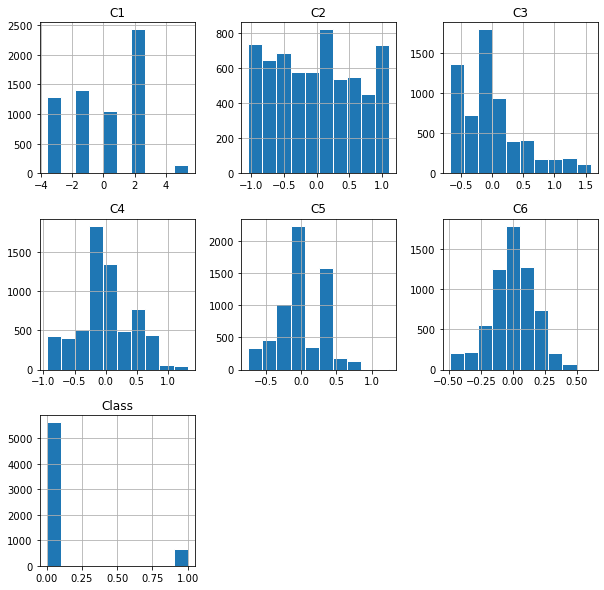

In [52]:
df_pca.hist(figsize = (10,10), edgecolor = 'white') 
plt.show

## COMPARING DF, LDA AND PCA

in the following cells, histograms will be displayed to compare the results of the DF, LDA and PCA

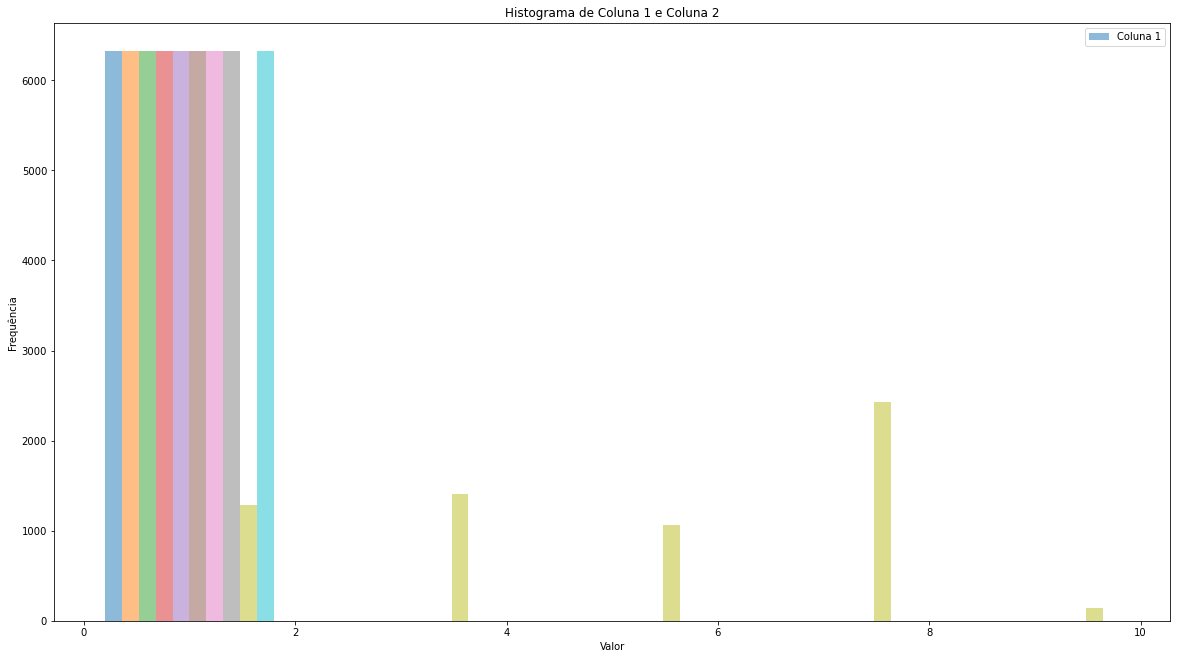

In [53]:
import matplotlib.pyplot as plt



plt.hist(df, bins=5, alpha=0.5, label='Coluna 1')


plt.title('Histograma de Coluna 1 e Coluna 2')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend(loc='upper right')


plt.show()

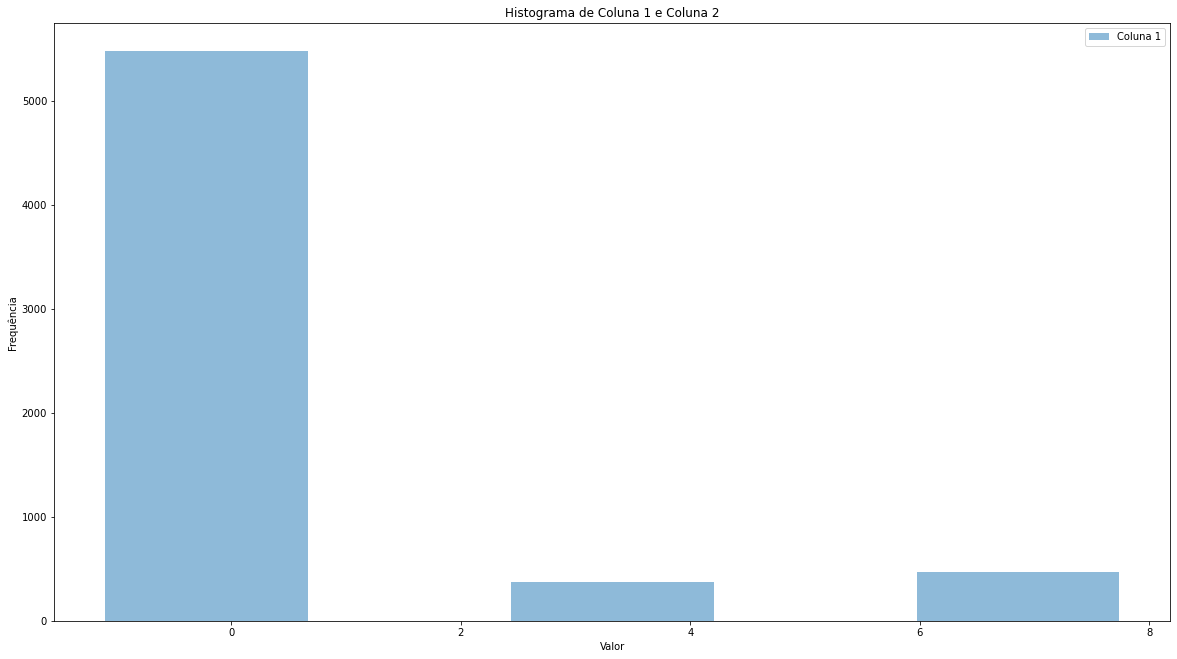

In [54]:
plt.hist(linear_df['LDA'], bins=5, alpha=0.5, label='Coluna 1')

plt.title('Histograma de Coluna 1 e Coluna 2')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend(loc='upper right')


plt.show()

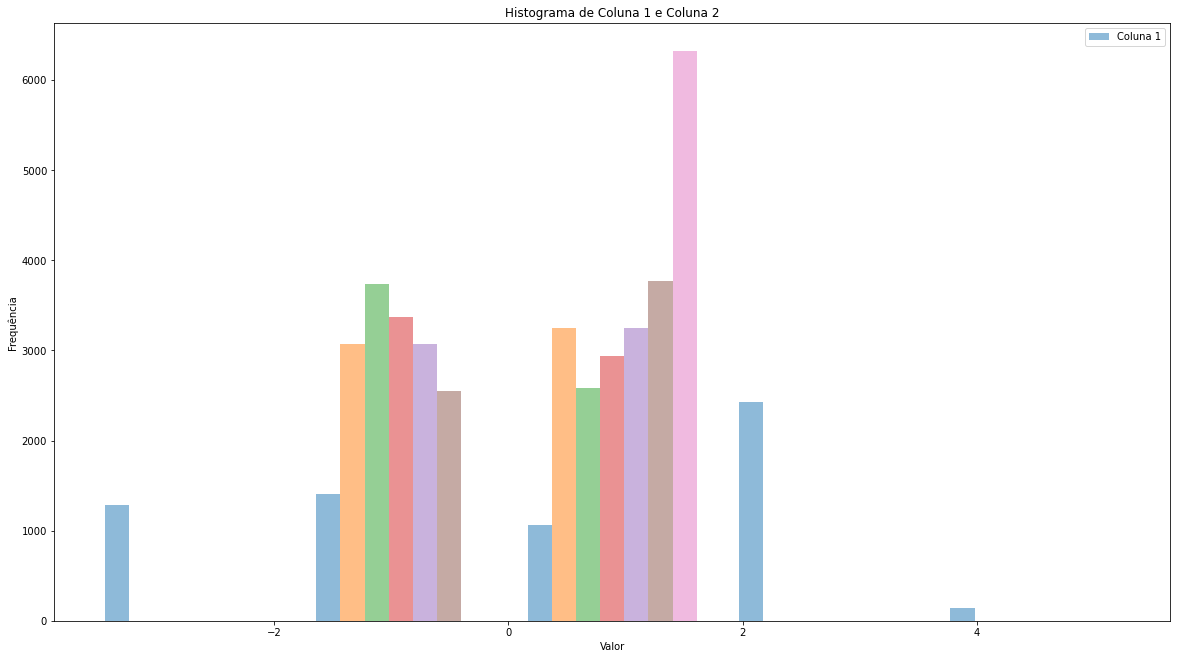

In [55]:

plt.hist(df_pca, bins=5, alpha=0.5, label='Coluna 1')

plt.title('Histograma de Coluna 1 e Coluna 2')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend(loc='upper right')


plt.show()

As result, it was possible to notice the similarity between the histograms of DF and LDA. Which means that their frequence classification were close to each other than to PCA results

## BEST ML MODELS TO PERFORM

Lazypredict is a Python library for training and evaluating machine learning models. The LazyClassifier is a class within the lazypredict.Supervised module that provides a convenient interface for training and evaluating a variety of different machine learning models.

The LazyClassifier class will make it easier to train and evaluate multiple models on a data set by specifying a list of model types and their corresponding hyperparameters. It automatically handles tasks such as splitting the data into training and test sets, fitting the models to the training data, and evaluating their performance on the test data.

In [56]:
# Use the lazypredict method to know the best models to apply for predicting the dependet feature

import lazypredict
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  8.61it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               1.00               0.99     0.99      1.00   
BaggingClassifier                  1.00               0.99     0.99      1.00   
LGBMClassifier                     1.00               0.99     0.99      1.00   
XGBClassifier                      1.00               0.99     0.99      1.00   
DecisionTreeClassifier             1.00               0.99     0.99      1.00   
RandomForestClassifier             0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.99               0.98     0.98      0.99   
BernoulliNB                        0.98               0.98     0.98      0.98   
LinearDiscriminantAnalysis         0.97               0.98     0.98      0.97   
GaussianNB                         0.98               0.98     0.98      0.98   
QuadraticDiscriminantAnalysis      0.97               0.98     0.98      0.97   
NearestCentroid                    0.97               0.97     0.97      0.97   
SVC                                0.98               0.96     0.96      0.98   
Perceptron                         0.98               0.96     0.96      0.98   
LinearSVC                          0.98               0.96     0.96      0.98   
RidgeClassifier                    0.97               0.96     0.96      0.98   
RidgeClassifierCV                  0.97               0.96     0.96      0.98   
LabelPropagation                   0.98               0.96     0.96      0.98   
LabelSpreading                     0.98               0.96     0.96      0.98   
ExtraTreeClassifier                0.98               0.96     0.96      0.98   
SGDClassifier                      0.98               0.95     0.95      0.98   
KNeighborsClassifier               0.98               0.95     0.95      0.98   
LogisticRegression                 0.97               0.95     0.95      0.98   
CalibratedClassifierCV             0.97               0.94     0.94      0.97   
PassiveAggressiveClassifier        0.97               0.94     0.94      0.97   
DummyClassifier                    0.90               0.50     0.50      0.85   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 0.20  
BaggingClassifier                    0.07  
LGBMClassifier                       0.09  
XGBClassifier                        0.13  
DecisionTreeClassifier               0.01  
RandomForestClassifier               0.30  
AdaBoostClassifier                   0.25  
BernoulliNB                          0.02  
LinearDiscriminantAnalysis           0.02  
GaussianNB                           0.01  
QuadraticDiscriminantAnalysis        0.01  
NearestCentroid                      0.01  
SVC                                  0.12  
Perceptron                           0.02  
LinearSVC                            0.05  
RidgeClassifier                      0.01  
RidgeClassifierCV                    0.02  
LabelPropagation                     0.68  
LabelSpreading                       0.95  
ExtraTreeClassifier                  0.01  
SGDClassifier                        0.02  
KNeighborsClassifier                 0.09  
LogisticRegression                   0.03  
CalibratedClassifierCV               0.20  
PassiveAggressiveClassifier          0.02  
DummyClassifier                      0.01

## ML MODELS, CROSS VALIDATIONS AND CONFUSION MATRIX

Machine learning is a method of teaching computers to learn and make decisions based on data, without explicitly programming them to do so. It is a type of artificial intelligence that involves training a model on a data set so that it can make predictions or take actions based on new input data.

There are several different types of machine learning, including supervised learning, unsupervised learning, semi-supervised learning, and reinforcement learning.

In supervised learning, the model is trained on a labeled data set, where the correct output is provided for each example in the training set. The goal of supervised learning is to make predictions about new, unseen examples by learning the relationship between the input data and the output labels.

In unsupervised learning, the model is not provided with labeled training examples. Instead, it must discover the underlying structure of the data through techniques such as clustering.

In semi-supervised learning, the model is trained on a data set that is partially labeled and partially unlabeled.

In reinforcement learning, the model learns by interacting with its environment and receiving feedback in the form of rewards or penalties.

Machine learning has a wide range of applications, including image and speech recognition, natural language processing, fraud detection, and recommendation systems. It is an active and growing field of research, with new techniques and applications being developed all the time.






## SVC MODEL

Svm import SVC) for fitting a model. SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.
In this case, it will be one of the 3 models used to predict and classify, showing the accuracy.

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


SVC = SVC(kernel='linear', C=1, random_state=1)


SVC.fit(X_train, y_train)


predictions_svc = SVC.predict(X_test)

score_svc = accuracy_score(y_test, predictions_svc)
print(f'The score of the model is {score_svc:.2%}')

The score of the model is 97.72%


## CROSS VALIDATION: SVC MOCEL

Cross-validation is a method for evaluating the performance of a machine learning model. It involves partitioning a data set into a training set and a test set, training the model on the training set, and evaluating its performance on the test set. This process is repeated multiple times, with different splits of the data into training and test sets, to obtain an estimate of the model's performance.

It is useful because it allows you to evaluate a model's performance on a held-out test set, which can give you a better estimate of how the model will perform on unseen data. It can also help to identify overfitting, which is when a model performs well on the training data but poorly on the test data, indicating that it has learned the noise in the training data rather than the underlying relationship.

In [58]:
from sklearn.model_selection import cross_val_score, KFold



# Cross Validation of Random Forest Classifier with 5%, 10%%, 15% and 20%

score_list_SVC = []

for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


   
    scores_SVC = cross_val_score(SVC, X, y, cv=kf)


    score_list_SVC.append({i:scores_SVC, 'mean': scores_SVC.mean()})
    
    
  
    cross_score_svc = (scores_SVC.mean())
    print(f'The cross score is {cross_score_svc:.2%}')

The cross score is 98.04%
The cross score is 98.04%
The cross score is 98.04%
The cross score is 98.04%


## CONFUSION MATRIX: SVC MODEL

A confusion matrix is a table that is used to evaluate the performance of a classification model. It displays the number of true positive, true negative, false positive, and false negative predictions made by the model. The rows of the confusion matrix represent the actual class labels, and the columns represent the predicted class labels.

The entries in the confusion matrix can be used to calculate a variety of evaluation metrics, such as precision, recall, and f1-score. These metrics can help you to understand how well the model is performing and identify any areas for improvement.

[[1392   33]
 [   3  153]]


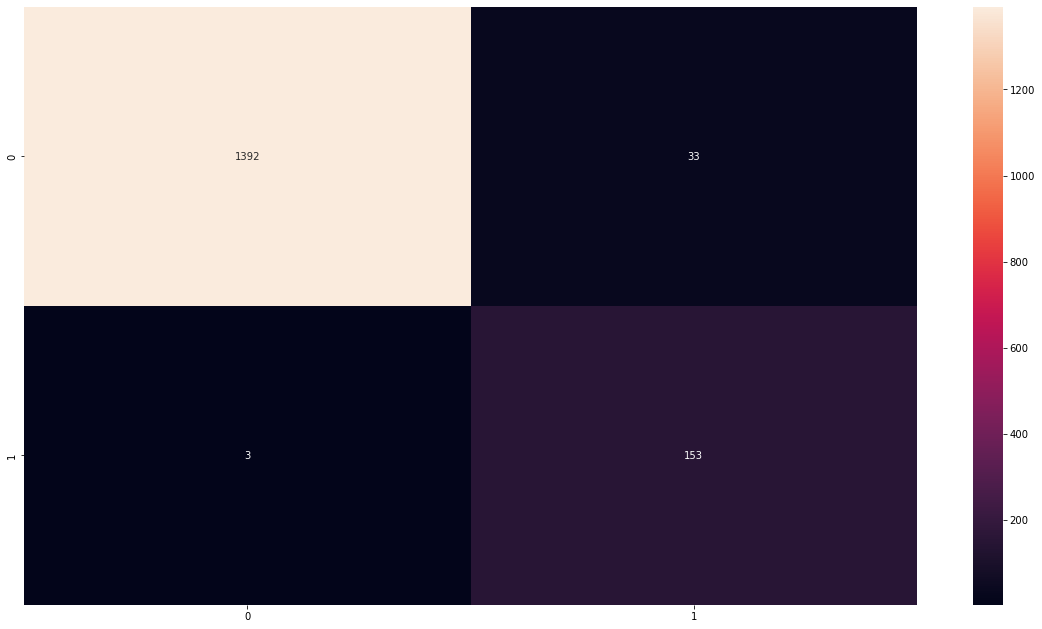

In [59]:
from sklearn.metrics import confusion_matrix


# Calculate cm by calling a method named as 'confusion_matrix' of the model forest results
cm = confusion_matrix(y_test, predictions_svc)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)

INTERPRETATION OF THE CONFUSION MATRIX TABLE

FROM THE 1581 VALUES TAKEN FROM THE DATASET TO BE TESTED:

- 0 & 0 = 1392 CASES -  TRUE / TRUE
- 0 & 1 = 3 CASES - TRUE / FALSE
- 0 & 1 = 33 CASES - FALSE / TRUE
- 1 & 1 = 153 CASES - FALSE / FALSE


PS: THE SAME INTERPRETATION WILL METHOD WILL BE GIVEN TO THE NEXT TABLES

## BERNOULLINB MODEL

Naive Bayes classifier for multivariate Bernoulli models. Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [60]:
from sklearn.naive_bayes import BernoulliNB



BNB = BernoulliNB(alpha=1.0)


BNB.fit(X_train, y_train)


predictions_bnb = BNB.predict(X_test)


score_bnb = accuracy_score(y_test, predictions_bnb)
print(f'The score of the model is {score_bnb:.2%}')

The score of the model is 98.04%


## CROSS VALIDATION: BERNOULLINB MODEL

In [61]:
from sklearn.model_selection import cross_val_score, KFold



# Cross Validation of Random Forest Classifier with 5%, 10%%, 15% and 20%

score_list_BNB = []

for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


   
    scores_BNB = cross_val_score(BNB, X, y, cv=kf)


    score_list_BNB.append({i:scores_BNB, 'mean': scores_BNB.mean()})
    
    cross_score_bnb = (scores_BNB.mean())
    print(f'The cross score is {cross_score_bnb:.2%}')

The cross score is 98.20%
The cross score is 98.20%
The cross score is 98.20%
The cross score is 98.20%


## CONFUSION MATRIX: BERNOULLINB MODEL

[[1396   29]
 [   2  154]]


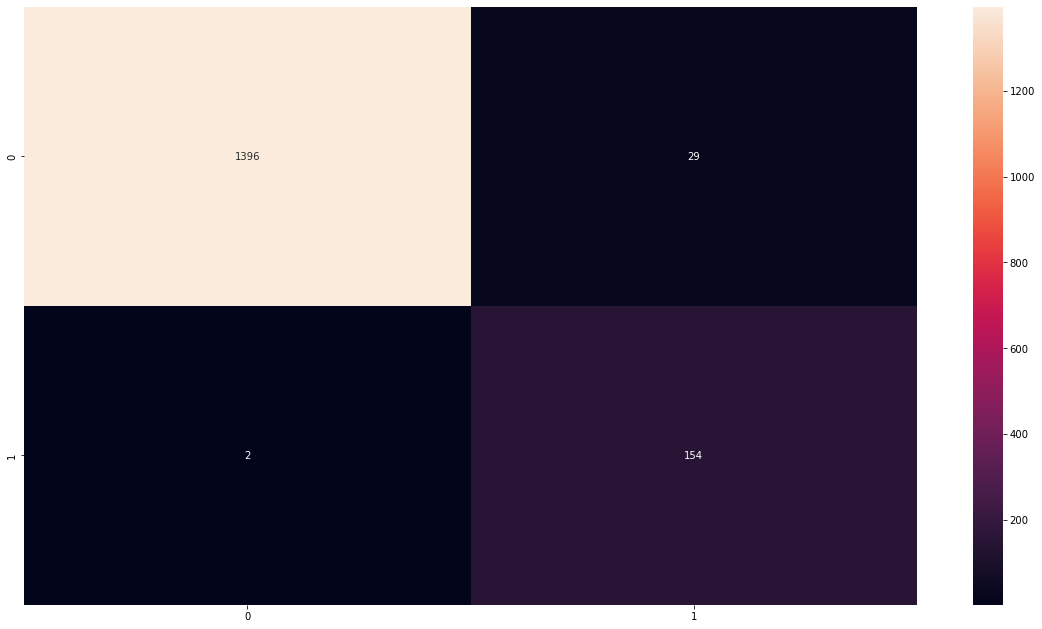

In [62]:
# Calculate cm by calling a method named as 'confusion_matrix' of the model forest results
cm = confusion_matrix(y_test, predictions_bnb)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)

## GAUSSIANNB MODEL

Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions.

In [63]:
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()


GNB.fit(X_train, y_train)


predictions_gnb = GNB.predict(X_test)


score_gnb = accuracy_score(y_test, predictions_gnb)
print(f'A pontuação do modelo é {score_gnb:.2%}')

A pontuação do modelo é 97.72%


## CROSS VALIDATION: GAUSSIANNB MODEL

In [64]:
from sklearn.model_selection import cross_val_score, KFold



# Cross Validation of Random Forest Classifier with 5%, 10%%, 15% and 20%

score_list_GNB = []

for i in [20, 10, 7, 5]:
    
    kf = KFold(n_splits = i, random_state = 42, shuffle = True)


   
    scores_GNB = cross_val_score(GNB, X, y, cv=kf)


    score_list_GNB.append({i:scores_GNB, 'mean': scores_GNB.mean()})
    
    cross_score_gnb = (scores_GNB.mean())
    print(f'The cross score is {cross_score_gnb:.2%}')

The cross score is 98.01%
The cross score is 98.01%
The cross score is 98.01%
The cross score is 97.99%


[[1391   34]
 [   2  154]]


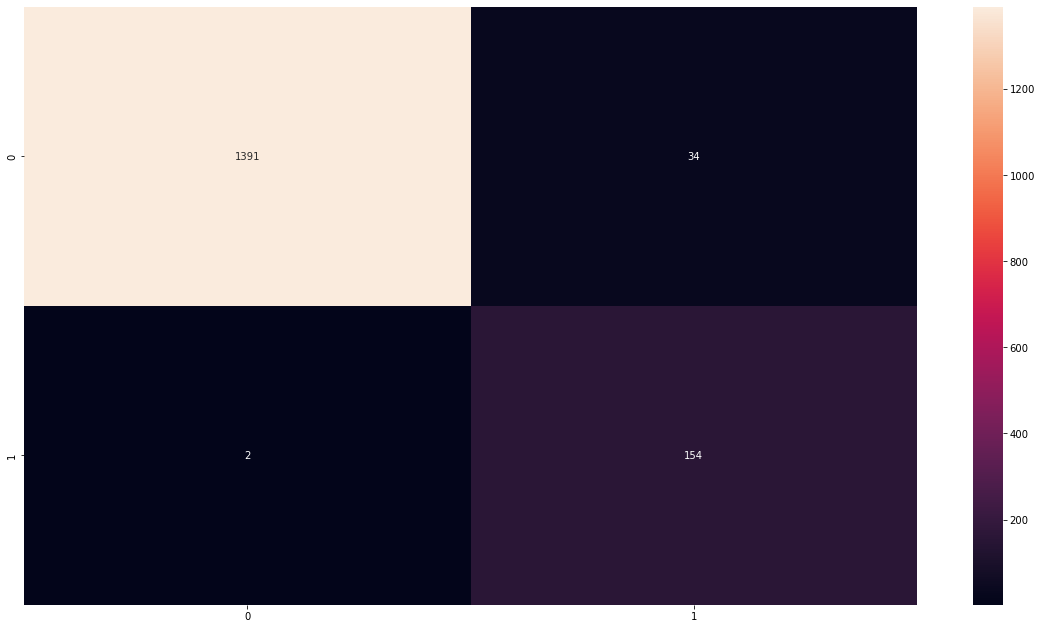

In [65]:
# Calculate cm by calling a method named as 'confusion_matrix' of the model forest results
cm = confusion_matrix(y_test, predictions_gnb)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, fmt='g', annot = True)
print(cm)

## PERFORMING MODELS WITH DF_PCA

In order to obtain the results of the analysis made with the PCA, the same method will be repeated in the machine learning processes below to find out if the accuracy of the prediction models are greater or less than those of the models applied in the original dataset

In [66]:
df_pca

C1    C2    C3    C4    C5    C6  Class
0     0.38 -0.36  0.03  0.71 -0.69 -0.20      0
1     0.38 -0.28  0.09  0.62 -0.70 -0.21      0
2     2.38 -0.84 -0.23 -0.01 -0.05 -0.04      0
3     2.38 -0.92 -0.04  0.01 -0.23  0.02      0
4     2.38 -0.91 -0.07  0.02 -0.21  0.01      0
...    ...   ...   ...   ...   ...   ...    ...
6314 -1.61  0.38  1.25  0.68  0.35 -0.14      0
6315  2.38 -0.28 -0.07  0.72 -0.60 -0.04      0
6316  2.39  0.03 -0.63  0.59 -0.03 -0.21      1
6317  2.39  0.05 -0.61  0.58 -0.04 -0.20      0
6318  2.39  0.33 -0.43  0.31 -0.05 -0.22      0

[6319 rows x 7 columns]

TRAIN TEST SPLIT again to obtain new entris for values of X and y.

In [67]:
# Training_set

X = df_pca.iloc[:,0:5].values  # All variables without the target variable
y = df_pca.iloc[:,-1].values # All variables including the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [68]:
# Display the rows and columns (dimenions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimenions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Total number of rows and columns for the complete dataset:  (6319, 5) (6319,)
Number of rows and columns after splitting dataset:  (4739, 5) (1580, 5) (4739,) (1580,)


In [69]:
# Use the lazypredict method to know the best models to apply for predicting the dependet feature

import lazypredict
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.79it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.46               0.53     0.53      0.55   
ExtraTreeClassifier                0.81               0.51     0.51      0.81   
PassiveAggressiveClassifier        0.87               0.50     0.50      0.84   
AdaBoostClassifier                 0.90               0.50     0.50      0.85   
LinearDiscriminantAnalysis         0.90               0.50     0.50      0.85   
SVC                                0.90               0.50     0.50      0.85   
SGDClassifier                      0.90               0.50     0.50      0.85   
RidgeClassifierCV                  0.90               0.50     0.50      0.85   
RidgeClassifier                    0.90               0.50     0.50      0.85   
QuadraticDiscriminantAnalysis      0.90               0.50     0.50      0.85   
LogisticRegression                 0.90               0.50     0.50      0.85   
LinearSVC                          0.90               0.50     0.50      0.85   
GaussianNB                         0.90               0.50     0.50      0.85   
DummyClassifier                    0.90               0.50     0.50      0.85   
CalibratedClassifierCV             0.90               0.50     0.50      0.85   
BernoulliNB                        0.90               0.50     0.50      0.85   
KNeighborsClassifier               0.89               0.50     0.50      0.85   
LGBMClassifier                     0.89               0.50     0.50      0.85   
RandomForestClassifier             0.88               0.50     0.50      0.84   
XGBClassifier                      0.88               0.49     0.49      0.84   
BaggingClassifier                  0.88               0.49     0.49      0.84   
DecisionTreeClassifier             0.80               0.49     0.49      0.81   
LabelPropagation                   0.88               0.49     0.49      0.84   
ExtraTreesClassifier               0.85               0.49     0.49      0.83   
Perceptron                         0.87               0.49     0.49      0.84   
LabelSpreading                     0.88               0.49     0.49      0.84   

                               Time Taken  
Model                                      
NearestCentroid                      0.01  
ExtraTreeClassifier                  0.02  
PassiveAggressiveClassifier          0.02  
AdaBoostClassifier                   0.28  
LinearDiscriminantAnalysis           0.02  
SVC                                  0.84  
SGDClassifier                        0.02  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.01  
QuadraticDiscriminantAnalysis        0.01  
LogisticRegression                   0.02  
LinearSVC                            0.09  
GaussianNB                           0.01  
DummyClassifier                      0.01  
CalibratedClassifierCV               0.41  
BernoulliNB                          0.02  
KNeighborsClassifier                 0.06  
LGBMClassifier                       0.09  
RandomForestClassifier               1.42  
XGBClassifier                        0.25  
BaggingClassifier                    0.31  
DecisionTreeClassifier               0.08  
LabelPropagation                     0.73  
ExtraTreesClassifier                 0.44  
Perceptron                           0.01  
LabelSpreading                       0.82

In [70]:
from sklearn.neighbors import NearestCentroid



clf = NearestCentroid()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.54


In [71]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 0.86


In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


SVC = SVC(kernel='linear', C=1, random_state=1)


SVC.fit(X_train, y_train)


predictions_svc = SVC.predict(X_test)

score_svc = accuracy_score(y_test, predictions_svc)
print(f'The score of the model is {score_svc:.2%}')

The score of the model is 89.75%


## CONCLUSIONS

To begin with, it's important to remember that the goal of applying machine learning models is to find patterns in data and make predictions or decision-making based on those patterns. On a given dataset, the performance of a model can be measured by how accurate it is in predicting results. In the present case, the analysis of the machine learning models was performed on two different datasets: the original dataset and a dataset transformed by the Principal Components Analysis (PCA) method. After applying the models to both datasets, it was observed that the models performed better on the original dataset compared to the PCA-transformed dataset.To explain this difference in the performance of the models, it is important to remember that PCA is a data pre-processing technique that aims to find a more compact representation of the data, while maintaining most of the variability present in the models.original data. This is done by selecting new variables, called principal components, which are linear combinations of the original variables.Although PCA can be useful in some cases, transforming the data can lead to the loss of important information that can be used by machine learning models. This could be one of the reasons why the models performed better in the original dataset.In summary, analysis of the machine learning models showed that they performed better on the original dataset compared to the PCA-transformed dataset. This could have occurred due to the loss of important information caused by the transformation of the data by the PCA.

## REFERENCE LIST

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository: Shill Bidding Dataset Data Set. [online] Available at: https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset.

‌chat.openai.com. (n.d.). ChatGPT. [online] Available at: https://chat.openai.com/chat.

‌Libguides.com. (2012). LibGuides: Harvard referencing quick guide: Citing and referencing material. [online] Available at: https://dkit.ie.libguides.com/harvard/citing-referencing.

matplotlib.org. (n.d.). Boxplot Demo — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py.

Mckinney, W. (2013). Python for data analysis. Beijing: O’reilly.

Müller, A.C. and Guido, S. (2017). Introduction to machine learning with Python : a guide for data scientists. Beijing: O’reilly.

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/.

scikit-learn. (n.d.). 1.4. Support Vector Machines. [online] Available at: https://scikit-learn.org/stable/modules/svm.html#svc [Accessed 5 Jan. 2023].

Stack Overflow. (n.d.). python - Histogram Matplotlib. [online] Available at: https://stackoverflow.com/questions/5328556/histogram-matplotlib [Accessed 10 Nov. 2022].

Stack Overflow. (n.d.). python - Word count of Markdown cells in Jupyter Notebook. [online] Available at: https://stackoverflow.com/questions/71194571/word-count-of-markdown-cells-in-jupyter-notebook [Accessed 10 Nov. 2022].

Summerfield, M. (2010). Programming in Python 3 : a complete introduction to the Python language. Upper Saddle River, New Jersey: Addison-Wesley.‌